In [10]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [9]:
offers = pd.read_feather('offer_dump.feather')
print(offers.shape)
offers = offers.drop_duplicates('id')
offers = offers.dropna(subset='added_on', axis=0)
print(offers.shape)

(163986, 39)
(163017, 39)


Might need to clean up this data more but for now I'll keep an eye out on anomalies not to miss out on some data.

<function matplotlib.pyplot.show(close=None, block=None)>

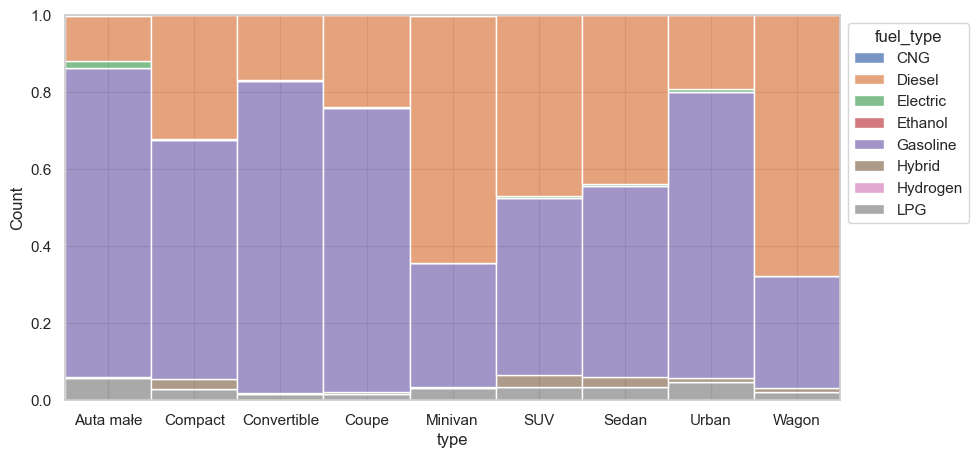

In [179]:
plt.figure(figsize=(10, 5))

modern_offers = offers[offers.year >= 2005][offers.year <= 2021]

ax = sns.histplot(
    modern_offers,
    x="type", hue="fuel_type", #discrete=True,
    multiple="fill",
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show

Prior to this exploration I was guesstimating that the car I'm looking for will be no older than 10 years, this period seems to be a peak diesel.

Why did diesel lose on popularity compared to regular gasoline?

<function matplotlib.pyplot.show(close=None, block=None)>

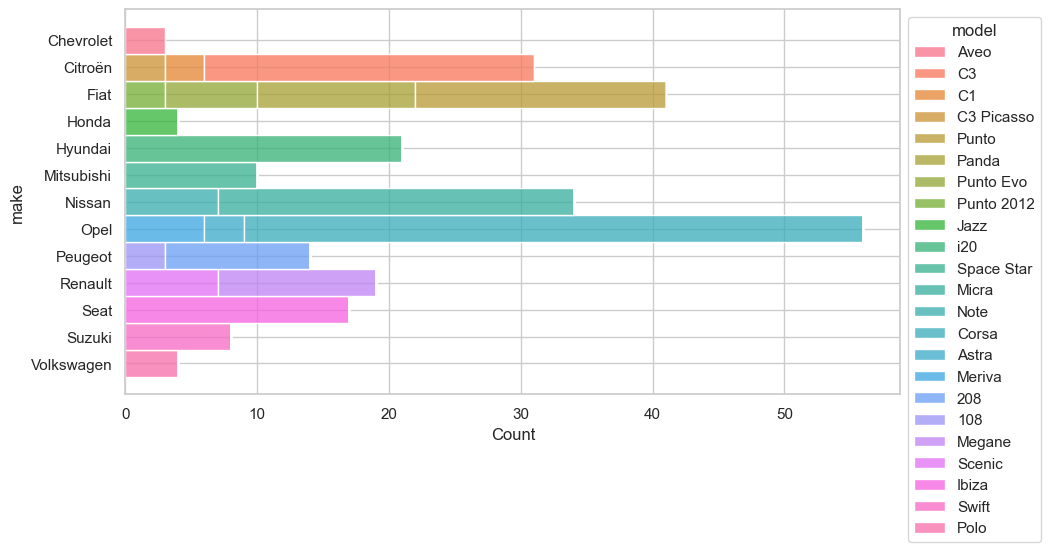

In [173]:
plt.figure(figsize=(10, 5))

modern_offers = offers[offers.year >= 2013][offers.year <= 2016]
modern_offers = modern_offers[modern_offers.make != 'Dacia'][modern_offers.make != 'Skoda'][modern_offers.make != 'Ford']
modern_offers = modern_offers[modern_offers.price <= 30000]
modern_offers = modern_offers[modern_offers.engine_size >= 1150]
modern_offers = modern_offers[modern_offers.doors >= 5]
modern_offers = modern_offers[modern_offers.total_mileage <= 125000]
modern_offers = modern_offers[modern_offers.fuel_type == 'Gasoline']
modern_offers = modern_offers[modern_offers.groupby('model')['model'].transform('size') >= 3]
modern_offers = modern_offers.astype({'make': 'str'})

ax = sns.histplot(
    modern_offers,
    y="make", hue="model", discrete=True,
    multiple="stack",
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show